Instituto de Ciências Matemáticas e de Computação - ICMC/USP \\
Introdução à Inferência Estatística - SME0221 \\

# **Análise Inferencial do Impacto da Indústria, Experiência e Flexibilidade no Salário Anual Global**

Isabela Vaz Lino de Oliveira - NUSP: 17052705 \\
Júlia Campos Bueno Paz Perez - NUSP: 13749872 \\
Laura Fernandes Pinilha Vita - NUSP: 14758791


## **1. Introdução**

Este estudo visa investigar como características profissionais e organizacionais impactam o salário anual bruto de profissionais ao redor do mundo. Os dados utilizados foram obtidos a partir da base **"Work-from-Anywhere Salary Insight (2024)"**, disponível publicamente no Kaggle:  
🔗 [https://www.kaggle.com/datasets/atharvasoundankar/work-from-anywhere-salary-insight-2024](https://www.kaggle.com/datasets/atharvasoundankar/work-from-anywhere-salary-insight-2024)

O foco da análise está em compreender se variáveis como setor da indústria, nível de experiência, tipo de vínculo empregatício e flexibilidade remota estão relacionadas ao salário e à satisfação dos profissionais. Para isso, os dados serão filtrados, mantendo apenas as variáveis relevantes, e diferentes testes estatísticos serão aplicados conforme as propriedades de cada variável.

As perguntas norteadoras da análise são:

1. **Os salários variam entre os setores da indústria?**   
2. **A flexibilidade do trabalho remoto influencia na satisfação dos profissionais?**  
3. **Os salários diferem entre os diferentes níveis de flexibilidade remota?**  






## **2. Pré-Processamento da Base de Dados**
Para tornar as análises mais objetivas e focadas nas questões propostas, será realizado um filtro nas variáveis disponíveis, mantendo apenas aquelas relevantes para as investigações estatísticas. Além disso, os nomes das variáveis serão renomeados para o português, visando facilitar a interpretação dos resultados ao longo do estudo.

### **2.1 Importando os dados**

In [2]:
import kagglehub

# Importar os dados
path = kagglehub.dataset_download("atharvasoundankar/work-from-anywhere-salary-insight-2024")

print("Path to dataset files:", path)

100%|██████████| 11.1k/11.1k [00:00<00:00, 6.15MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/atharvasoundankar/work-from-anywhere-salary-insight-2024/versions/1


In [3]:
import os

# Listar os arquivos
print(os.listdir(path))

['Work_From_Anywhere_Salary_Data.csv']


In [4]:
import pandas as pd

# Carregar os dados
dados_iniciais = pd.read_csv(path+"/Work_From_Anywhere_Salary_Data.csv")
dados_iniciais

,Company,Job Title,Industry,Location,Employment Type,Experience Level,Remote Flexibility,Salary (Annual),Currency,Years of Experience,Job Satisfaction Score (1-10),Tech Stack,Perks,Last Promotion (Years Ago)
0,Microsoft,Data Analyst,Media,Austin,Part-time,Mid,Remote,155200.11,AUD,1.3,7,"Python, SQL",Stock Options,0.47
1,Apple,Data Scientist,Retail,San Francisco,Part-time,Lead,Remote,106365.54,INR,12.1,1,"JavaScript, React",Gym Membership,1.70
2,Amazon,Software Engineer,Healthcare,San Francisco,Full-time,Lead,Remote,91026.49,INR,9.1,1,"C#, .NET",Gym Membership,2.68
3,Tesla,Data Analyst,Retail,Austin,Contract,Mid,Onsite,41824.38,EUR,11.6,2,"JavaScript, React",Stock Options,1.90
4,Adobe,DevOps Engineer,Healthcare,New York,Contract,Senior,Remote,143929.78,USD,9.1,3,"Go, Kubernetes",Health Insurance,0.82
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,Google,UX Designer,Retail,San Francisco,Full-time,Mid,Onsite,105619.55,AUD,4.9,4,"C#, .NET",Flexible Hours,1.15
496,Microsoft,Product Manager,Finance,San Francisco,Part-time,Lead,Remote,93840.51,EUR,1.1,10,"R, Tableau",Stock Options,4.45
497,Amazon,Software Engineer,Retail,Seattle,Part-time,Lead,Hybrid,53188.78,EUR,9.5,5,"JavaScript, React",Flexible Hours,0.64
498,IBM,Data Analyst,Healthcare,New York,Full-time,Lead,Hybrid,101098.05,INR,3.3,5,"Go, Kubernetes",Health Insurance,3.95


O conjunto de dados contém 500 observações e 14 variáveis, entre qualitativas e quantitativas.

### **2.2 Filtrando os dados**

In [5]:
# Verificar colunas
dados_iniciais.columns

Index(['Company', 'Job Title', 'Industry', 'Location', 'Employment Type',
       'Experience Level', 'Remote Flexibility', 'Salary (Annual)', 'Currency',
       'Years of Experience', 'Job Satisfaction Score (1-10)', 'Tech Stack',
       'Perks', 'Last Promotion (Years Ago)'],
      dtype='object')

In [6]:
# Filtrar colunas
colunas = [
    'Industry', 'Remote Flexibility', 'Salary (Annual)',
    'Currency', 'Job Satisfaction Score (1-10)'
]

# Renomear para português
colunas_renomeadas = {
    'Industry': 'Indústria',
    'Remote Flexibility': 'Flexibilidade Remota',
    'Salary (Annual)': 'Salário Anual',
    'Currency': 'Moeda',
    'Job Satisfaction Score (1-10)': 'Satisfação no Trabalho (1-10)'
}

# Aplicar filtro e renomeação
dados = dados_iniciais[colunas].rename(columns=colunas_renomeadas)
dados

,Indústria,Flexibilidade Remota,Salário Anual,Moeda,Satisfação no Trabalho (1-10)
0,Media,Remote,155200.11,AUD,7
1,Retail,Remote,106365.54,INR,1
2,Healthcare,Remote,91026.49,INR,1
3,Retail,Onsite,41824.38,EUR,2
4,Healthcare,Remote,143929.78,USD,3
...,...,...,...,...,...
495,Retail,Onsite,105619.55,AUD,4
496,Finance,Remote,93840.51,EUR,10
497,Retail,Hybrid,53188.78,EUR,5
498,Healthcare,Hybrid,101098.05,INR,5


Vamos padronizar todos os salários para a mesma moeda, neste caso, em reais. Fonte: https://www.bcb.gov.br/estabilidadefinanceira/historicocotacoes

In [7]:
# Conferir quais moedas estão sendo usadas nos dados
pd.crosstab(dados['Moeda'], columns = 'Frequência')

col_0,Frequência
Moeda,
AUD,115
EUR,108
GBP,95
INR,96
USD,86


In [8]:
# Valor de cada moeda em BRL
taxas = {
    'USD': 6.1923,
    'EUR': 6.4282,
    'GBP': 7.7484,
    'AUD': 3.8504,
    'INR': 0.07245
}

In [9]:
# Converter salários para BRL com base na moeda
dados['Salário Anual (BRL)'] = dados.apply(
    lambda row: row['Salário Anual'] * taxas.get(row['Moeda'], 1),
    axis=1
)

# Manter apenas a coluna de Salário em BRL
dados.drop(columns=['Salário Anual', 'Moeda'], inplace=True)

pd.set_option('display.float_format', '{:.2f}'.format)
dados

,Indústria,Flexibilidade Remota,Satisfação no Trabalho (1-10),Salário Anual (BRL)
0,Media,Remote,7,597582.50
1,Retail,Remote,1,7706.18
2,Healthcare,Remote,1,6594.87
3,Retail,Onsite,2,268855.48
4,Healthcare,Remote,3,891256.38
...,...,...,...,...
495,Retail,Onsite,4,406677.52
496,Finance,Remote,10,603225.57
497,Retail,Hybrid,5,341908.12
498,Healthcare,Hybrid,5,7324.55


Após o pré-processamento, o conjunto de dados passou a conter 500 observações e 4 variáveis, entre quantitativas e qualitativas, conforme descrito a seguir:

- Variáveis quantitativas:  
  - Salário Anual (contínua)
  - Satisfação no Trabalho (discreta)

- Variáveis qualitativas nominais:  
  - Indústria   
  - Flexibilidade Remota   

## **3. Análise Exploratória dos Dados**

### **3.1 Análise descritiva**

In [10]:
# Tipos de dados
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Indústria                      500 non-null    object 
 1   Flexibilidade Remota           500 non-null    object 
 2   Satisfação no Trabalho (1-10)  500 non-null    int64  
 3   Salário Anual (BRL)            500 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 15.8+ KB


Como explicado na seção anterior, temos duas variáveis qualitativas e duas quantitativas. Agora, vamos fazer as análises descritivas.

**3.1.1 Variáveis qualitativas**

In [36]:
# Frequência por categoria de Indústria
tabela = dados['Indústria'].value_counts().to_frame(name='Frequência Absoluta')
tabela['Porcentagem (%)'] = (dados['Indústria'].value_counts(normalize=True) * 100).round(2)
tabela.reset_index(inplace=True)
tabela.columns = ['Indústria', 'Frequência Absoluta', 'Porcentagem (%)']
tabela

,Indústria,Frequência Absoluta,Porcentagem (%)
0,Retail,100,20.00
1,Media,91,18.20
2,Education,83,16.60
3,Tech,77,15.40
4,Finance,76,15.20
5,Healthcare,73,14.60


**Indústria**  
- Seis categorias distintas foram identificadas.  
- A categoria mais frequente é *Retail*, com 100 ocorrências.

In [37]:
# Frequência por categoria de Flexibilidade Remota
tab = dados['Flexibilidade Remota'].value_counts().to_frame(name='Frequência Absoluta')
tab['Porcentagem (%)'] = (dados['Flexibilidade Remota'].value_counts(normalize=True) * 100).round(2)
tab.reset_index(inplace=True)
tab.columns = ['Flexibilidade Remota', 'Frequência Absoluta', 'Porcentagem (%)']
tab

,Flexibilidade Remota,Frequência Absoluta,Porcentagem (%)
0,Remote,185,37.00
1,Hybrid,167,33.40
2,Onsite,148,29.60


**Flexibilidade Remota**  
- Três modalidades foram observadas: *Remote*, *Hybrid* e *Onsite*.  
- A modalidade predominante é *Remote*, com 185 registros.

Portanto, as amostras estão balanceadas entre os grupos.

**3.1.2 Variáveis quantitativas**

In [34]:
# Estatísticas descritivas das variáveis quantitativas
dados.describe()

,Satisfação no Trabalho (1-10),Salário Anual (BRL)
count,500.00,500.00
mean,5.66,551806.32
std,2.91,402344.88
min,1.00,2422.70
25%,3.00,243208.72
50%,6.00,537938.50
75%,8.00,833222.78
max,10.00,1549116.23


**Satisfação no Trabalho (escala de 1 a 10)**  
- Média: 5,66  
- Desvio padrão: 2,91  
- Intervalo: de 1 a 10  
- Quartis:  
  - 25% das respostas até o nível 3
  - Mediana: 6
  - 75% dos indivíduos relatando satisfação de até 8

**Salário Anual (em BRL)**  
- Média: R\$ 551.806,32 \\
- Desvio padrão: R\$ 402.344,88  \\
- Intervalo: de R\$ 2.422,70 até R\$ 1.549.116,23  \\
- Quartis:  
  - 25% recebem até R\$ 243.208,72  
  - Mediana: R\$ 537.938,50  
  - 75% recebem até R\$ 833.222,78

**3.1.3 Cálculo das médias por grupo**

In [14]:
dados.groupby('Indústria')['Salário Anual (BRL)'].mean()

,Salário Anual (BRL)
Indústria,
Education,575832.73
Finance,519155.05
Healthcare,483880.20
Media,606204.99
Retail,550270.87
Tech,560237.20


A média salarial parece variar entre os setores da indústria, mas essas diferenças não são tão grandes à primeira vista. Por isso, é importante aplicar testes estatísticos para saber se essas variações são realmente significativas.

In [15]:
dados.groupby('Flexibilidade Remota')['Satisfação no Trabalho (1-10)'].mean()

,Satisfação no Trabalho (1-10)
Flexibilidade Remota,
Hybrid,5.38
Onsite,5.77
Remote,5.82


As médias de satisfação são bem similares entre os diferentes modelos de trabalho, com uma leve vantagem para o regime remoto. Ainda assim, é importante verificar se essas diferenças são estatisticamente significativas por meio de testes de hipótese. De forma geral, os dados sugerem que não há diferença relevante na satisfação entre os diferentes formatos de trabalho.

In [16]:
dados.groupby('Flexibilidade Remota')['Salário Anual (BRL)'].mean()

,Salário Anual (BRL)
Flexibilidade Remota,
Hybrid,534228.32
Onsite,587340.65
Remote,539246.57


As médias salariais também são próximas entre os diferentes modelos de trabalho. O regime presencial apresenta a maior média, seguido pelo remoto e, por fim, pelo híbrido. Apesar dessas variações, é necessário verificar se são estatisticamente significativas por meio de testes de hipótese.

### **3.2 Visualização dos dados**

In [17]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns

/tmp/ipython-input-18-675416703.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dados, x='Indústria', y='Salário Anual (BRL)', palette='pastel')


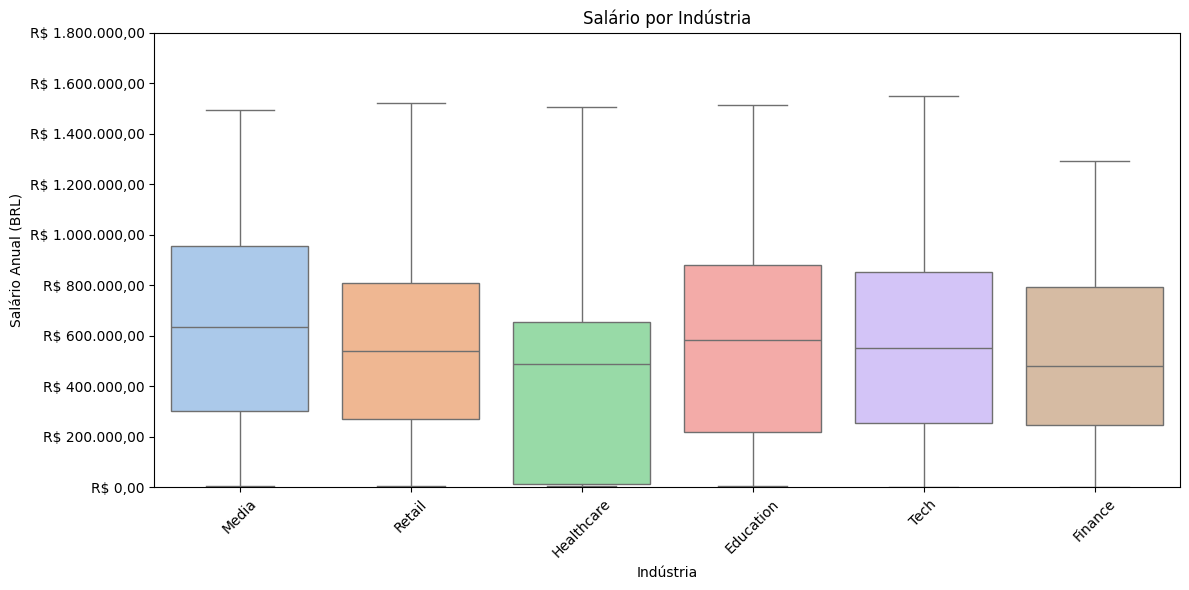

In [18]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=dados, x='Indústria', y='Salário Anual (BRL)', palette='pastel')

plt.title('Salário por Indústria')
plt.xlabel('Indústria')
plt.ylabel('Salário Anual (BRL)')
plt.xticks(rotation=45)
plt.ylim(0, 1_800_000)

# Formatação com ponto como separador decimal e milhar com vírgula
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'R$ {x:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.')))

plt.tight_layout()
plt.show()


O boxplot indica variações salariais entre os setores, com medianas mais altas em Media, Education e Tech, e a menor em Healthcare. Por outro lado, todos os setores apresentam ampla dispersão, sugerindo heterogeneidade nas remunerações.

/tmp/ipython-input-19-2444756373.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dados, x='Flexibilidade Remota', y='Satisfação no Trabalho (1-10)', palette='pastel')


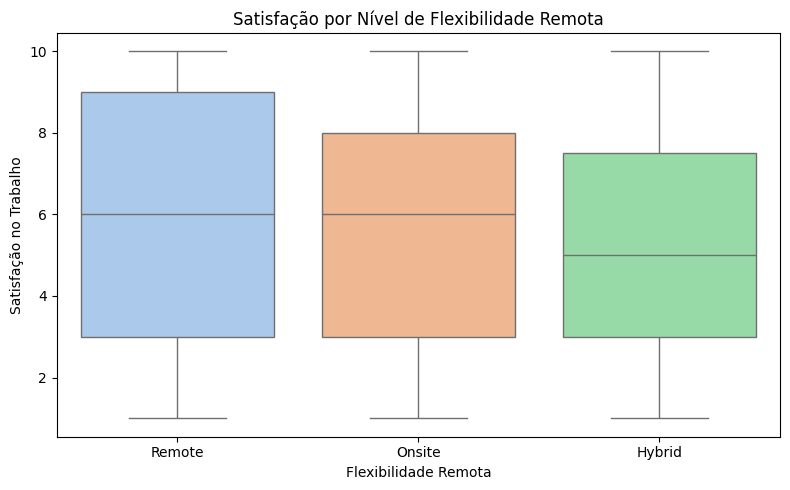

In [19]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=dados, x='Flexibilidade Remota', y='Satisfação no Trabalho (1-10)', palette='pastel')
plt.title('Satisfação por Nível de Flexibilidade Remota')
plt.xlabel('Flexibilidade Remota')
plt.ylabel('Satisfação no Trabalho')
plt.tight_layout()
plt.show()

O gráfico mostra que a satisfação no trabalho varia pouco entre os diferentes níveis de flexibilidade remota, com medianas semelhantes e ampla dispersão em todos os grupos. A modalidade remota apresenta maior variabilidade nas respostas.

/tmp/ipython-input-20-1152252050.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=dados, x='Flexibilidade Remota', y='Salário Anual (BRL)', palette='pastel')


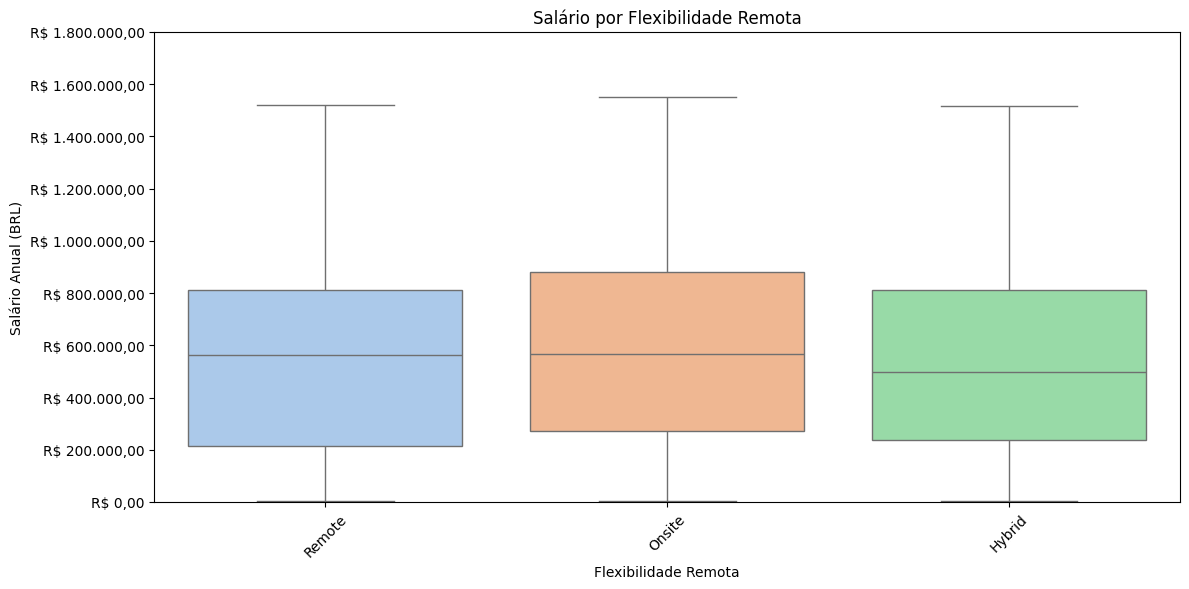

In [20]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=dados, x='Flexibilidade Remota', y='Salário Anual (BRL)', palette='pastel')
plt.title('Salário por Flexibilidade Remota')
plt.xlabel('Flexibilidade Remota')
plt.ylabel('Salário Anual (BRL)')
plt.xticks(rotation=45)

# Ajuste do eixo y (limite superior pode ser modificado conforme a distribuição dos seus dados)
plt.ylim(0, 1_800_000)

# Formatação do eixo y com separador de milhar e símbolo de real
plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'R$ {x:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.')))

plt.tight_layout()
plt.show()

O gráfico indica que os salários anuais são semelhantes entre os níveis de flexibilidade remota, com medianas próximas e alta dispersão em todos os grupos.

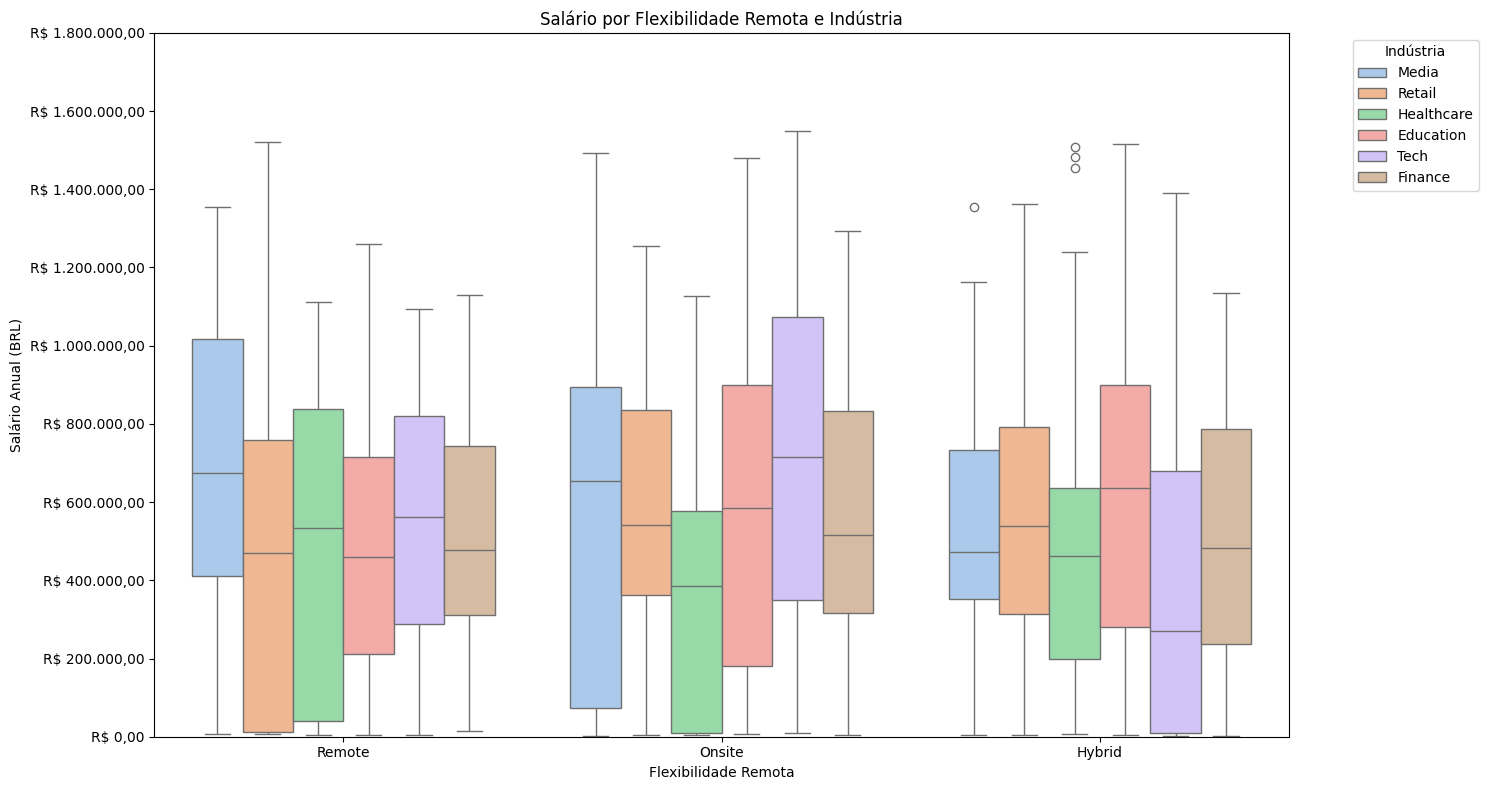

In [21]:
plt.figure(figsize=(15, 8))
sns.boxplot(
    data=dados,
    x='Flexibilidade Remota',
    y='Salário Anual (BRL)',
    hue='Indústria',
    palette='pastel'
)

plt.title('Salário por Flexibilidade Remota e Indústria')
plt.xlabel('Flexibilidade Remota')
plt.ylabel('Salário Anual (BRL)')

# Expandir o range do eixo y manualmente
plt.ylim(0, 1_800_000)  # ajuste conforme necessário

plt.gca().yaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'R$ {x:,.2f}'.replace(',', 'X').replace('.', ',').replace('X', '.')))

plt.legend(title='Indústria', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

O gráfico aponta que os salários variam amplamente entre setores e níveis de flexibilidade remota, sem diferenças marcantes entre os grupos. Setores como Media e Tech tendem a apresentar medianas mais altas, enquanto Healthcare tem valores mais baixos, especialmente no modelo presencial. A dispersão é elevada em todos os casos, com presença de salários extremos (outliers) no modelo híbrido.

## **4. Testes das suposições**

### **4.1 Teste de Shapiro-Wilk para Normalidade**
O teste de Shapiro-Wilk é um dos testes estatísticos mais utilizados para verificar se uma amostra segue uma distribuição normal. Este teste será aplicado para avaliar a normalidade das variáveis de interesse dentro de diferentes grupos da amostra.

---

**Hipóteses**

* H₀ (hipótese nula): os dados seguem uma distribuição normal.
* H₁ (hipótese alternativa): os dados não seguem uma distribuição normal


---

**Estatística de Teste - $W$**

Dada uma amostra ordenada de forma crescente $y_1, y_2, \dots, y_n$, o cálculo da estatística $W$ segue as etapas:

1. Calcular a soma dos quadrados dos desvios: \\
$S^2$ = $\sum_{i=1}^{n} (y_i - \bar{y})^2 = \sum_{i=1}^{n} y_i^2 - \frac{\left( \sum_{i=1}^{n} y_i \right)^2}{n}$

2. Calcular o numerador $b$:
    * Se $n = 2k$ (par), então: \\
        b = $\sum_{i=1}^{k} a_{n-i+1} \cdot (y_{n-i+1} - y_i)$

    * Se $n = 2k+1$ (ímpar), a fórmula é a mesma, com $a_{k+1} = 0$: \\
        b = $\sum_{i=1}^{k} a_{n-i+1} \cdot (y_{n-i+1} - y_i)$
   
Os coeficientes $a_i$ são valores tabelados, definidos com base no tamanho da amostra $n$.

3. Calcular a estatística $W$: \\
    $W = \frac{b^2}{S^2}$

4. Tomada de decisão: \\
Compare o valor de $W$ calculado com o valor crítico da tabela $W_{n;\alpha}$.
    * Se $W < W_{tabelado}$: rejeita-se $H_0$.
    * Se $W \geq W_{tabelado}$: não se rejeita $H_0$.

Na prática, bibliotecas estatísticas realizam automaticamente o cálculo da estatística $W$ e do valor-p e a decisão geralmente é tomada com base no valor-p. \\
* Se p > 0,05: não rejeitamos H₀ → os dados podem ser considerados normais.
* Se p ≤ 0,05: rejeitamos H₀ → os dados provavelmente não seguem uma distribuição normal.


---



**Aplicação no trabalho**

O teste de Shapiro-Wilk será utilizado como critério auxiliar na escolha entre testes paramétricos e não paramétricos, a depender da aderência dos dados à distribuição normal.

Neste projeto, a análise de normalidade será conduzida com o auxílio da função `shapiro` da biblioteca `scipy.stats`, que retorna a estatística do teste e o **valor-p**. A tomada de decisão será baseada no valor-p, adotando o nível de significância de 5%.

As variáveis avaliadas quanto à normalidade serão:

* **Salário Anual (BRL)**, considerando os grupos de **Indústria** e de **Flexibilidade Remota**;
* **Satisfação no Trabalho (1–10)**, considerando os grupos de **Flexibilidade Remota**.

A análise será conduzida em duas etapas complementares:

1. Aplicação do teste de Shapiro-Wilk para cada grupo da amostra;
2. Inspeção gráfica por meio de histogramas com curvas de densidade estimada, para avaliar visualmente o formato das distribuições.


In [23]:
from scipy.stats import shapiro

In [24]:
print("---Análise de normalidade Salário Anual (BRL) dentro dos grupos de Indústria---")

# Armazena os dados por grupo para uso posterior
resultados_shapiro = {}

for grupo, df_grupo in dados.groupby("Indústria"):
    valores = df_grupo['Salário Anual (BRL)'].dropna()
    stat, p = shapiro(valores)
    resultados_shapiro[grupo] = valores  # guarda para o gráfico depois

    print(f"-> Indústria: {grupo} | p-valor: {p:.4f}")
    if p > 0.05:
        print("Não rejeita H₀, não há evidência contra a normalidade.")
    else:
        print("Rejeito H₀, a distribuição não é normal.")

---Análise de normalidade Salário Anual (BRL) dentro dos grupos de Indústria---
-> Indústria: Education | p-valor: 0.0013
Distribuição não é normal (p ≤ 0.05).
-> Indústria: Finance | p-valor: 0.0154
Distribuição não é normal (p ≤ 0.05).
-> Indústria: Healthcare | p-valor: 0.0001
Distribuição não é normal (p ≤ 0.05).
-> Indústria: Media | p-valor: 0.0011
Distribuição não é normal (p ≤ 0.05).
-> Indústria: Retail | p-valor: 0.0022
Distribuição não é normal (p ≤ 0.05).
-> Indústria: Tech | p-valor: 0.0009
Distribuição não é normal (p ≤ 0.05).


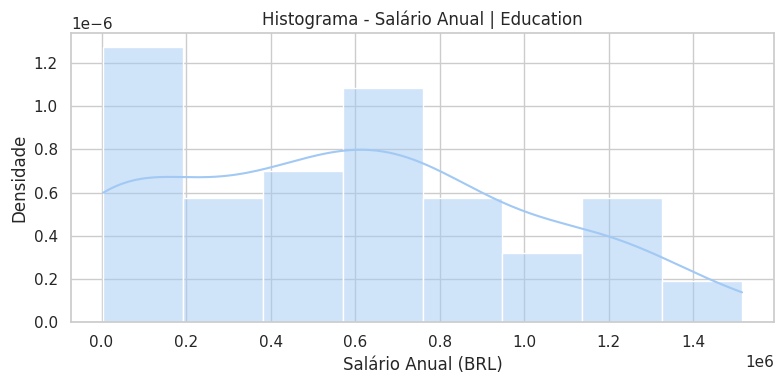

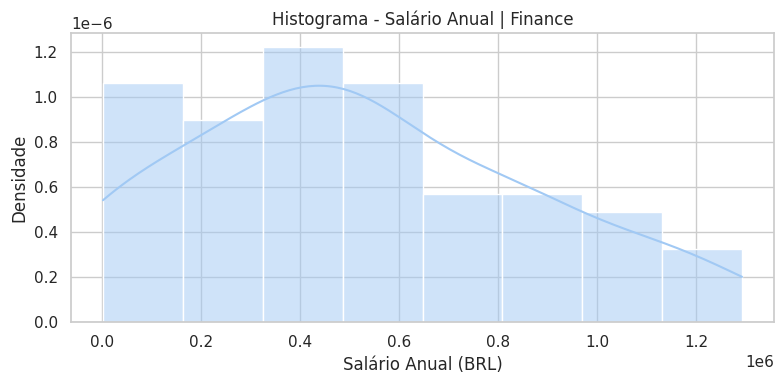

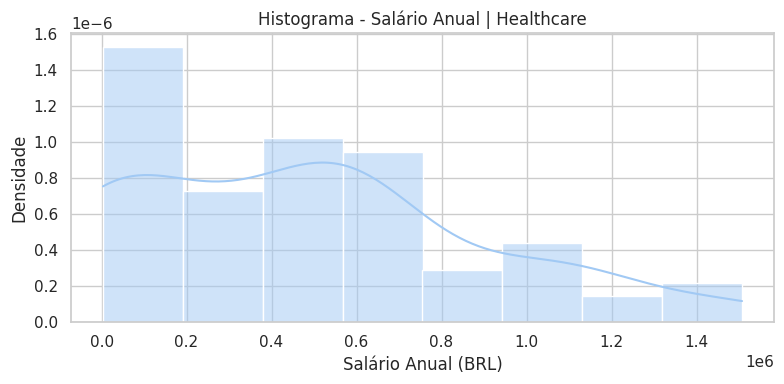

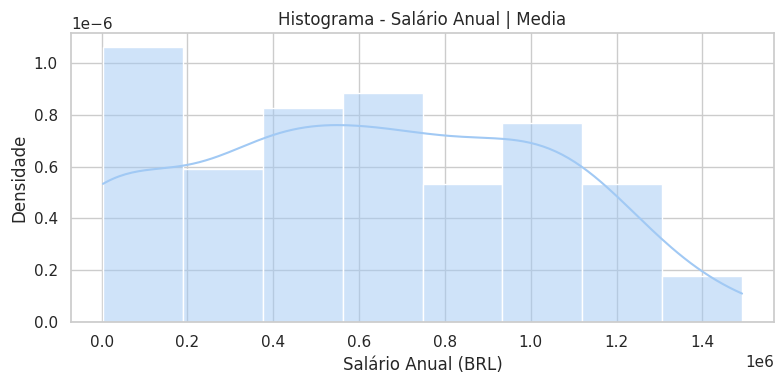

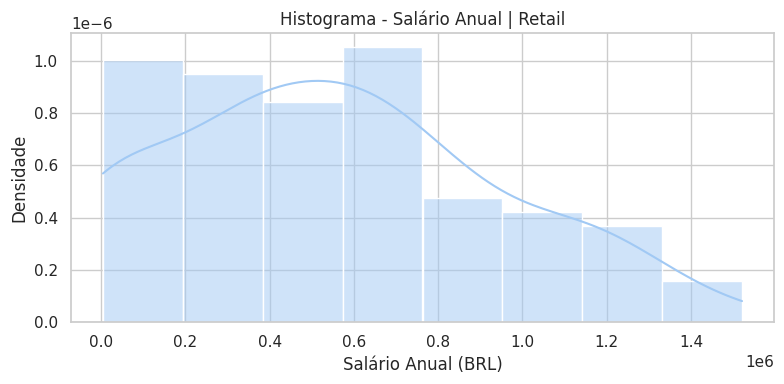

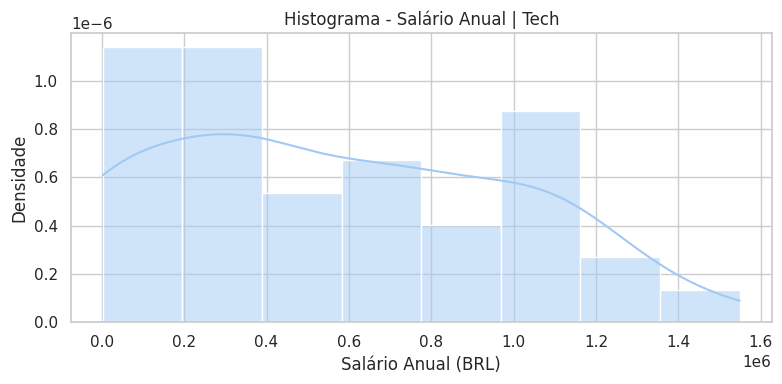

In [25]:
sns.set(style='whitegrid')

for grupo, valores in resultados_shapiro.items():
    plt.figure(figsize=(8, 4))
    sns.histplot(valores, kde=True, stat='density', color=sns.color_palette("pastel")[0])

    plt.title(f"Histograma - Salário Anual | {grupo}")
    plt.xlabel("Salário Anual (BRL)")
    plt.ylabel("Densidade")
    plt.tight_layout()
    plt.show()

Com base nos resultados do teste de Shapiro-Wilk, bem como na inspeção visual dos histogramas por grupo, observa-se que os salários anuais não seguem uma distribuição normal dentro dos diferentes grupos da Indústria.

In [26]:
print("---Análise de normalidade Salário Anual (BRL) dentro dos grupos de Flexibilidade Remota---")

# Armazena os dados por grupo para uso posterior nos gráficos
resultados_flex = {}

for grupo, df_grupo in dados.groupby("Flexibilidade Remota"):
    valores = df_grupo['Salário Anual (BRL)'].dropna()
    stat, p = shapiro(valores)
    resultados_flex[grupo] = valores

    print(f"-> Flexibilidade Remota: {grupo} | p-valor: {p:.4f}")
    if p > 0.05:
        print("Não rejeita H₀, não há evidência contra a normalidade.")
    else:
        print("Rejeito H₀, a distribuição não é normal.")

---Análise de normalidade Salário Anual (BRL) dentro dos grupos de Flexibilidade Remota---
-> Flexibilidade Remota: Hybrid | p-valor: 0.0000
Distribuição não é normal (p ≤ 0.05).
-> Flexibilidade Remota: Onsite | p-valor: 0.0001
Distribuição não é normal (p ≤ 0.05).
-> Flexibilidade Remota: Remote | p-valor: 0.0000
Distribuição não é normal (p ≤ 0.05).


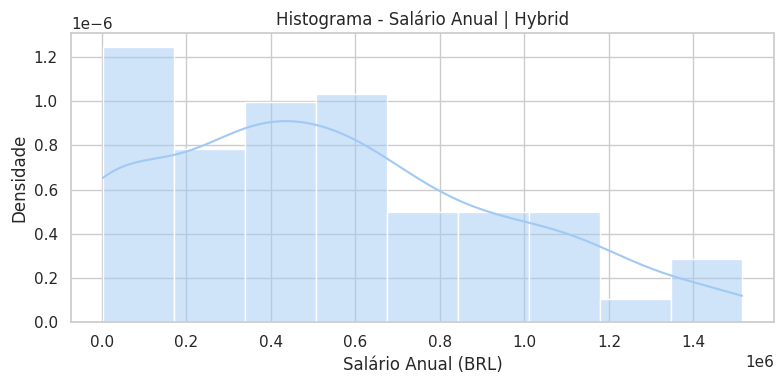

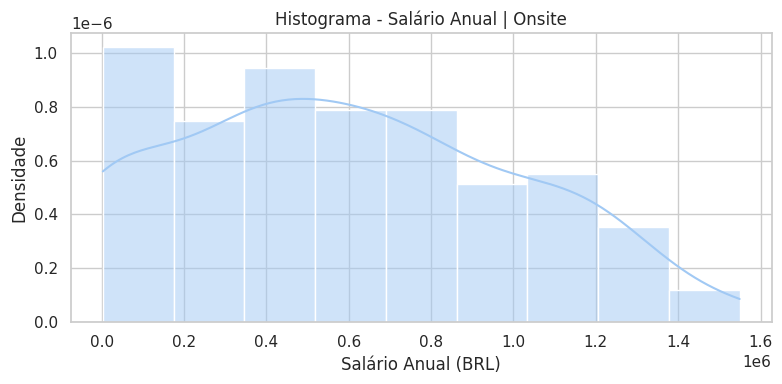

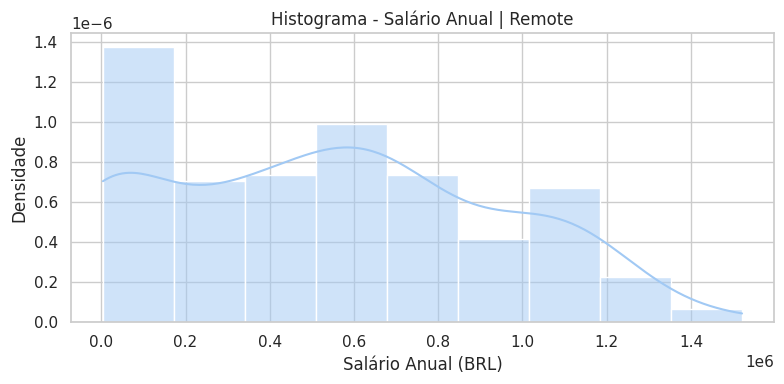

In [27]:
sns.set(style='whitegrid')

for grupo, valores in resultados_flex.items():
    plt.figure(figsize=(8, 4))
    sns.histplot(valores, kde=True, stat='density', color=sns.color_palette("pastel")[0])

    plt.title(f"Histograma - Salário Anual | {grupo}")
    plt.xlabel("Salário Anual (BRL)")
    plt.ylabel("Densidade")
    plt.tight_layout()
    plt.show()

Os resultados do teste de Shapiro-Wilk, aliados à análise visual dos histogramas por grupo, indicam que os salários anuais não apresentam distribuição normal nos diferentes níveis da Flexibilidade Remota.

In [28]:
print("---Análise de normalidade Satisfação no Trabalho (1-10) dentro dos grupos de Flexibilidade Remota---")

# Armazenar os dados por grupo para plot posterior
resultados_satisfacao = {}

for grupo, df_grupo in dados.groupby("Flexibilidade Remota"):
    valores = df_grupo['Satisfação no Trabalho (1-10)'].dropna()
    stat, p = shapiro(valores)
    resultados_satisfacao[grupo] = valores

    print(f"-> Flexibilidade Remota: {grupo} | p-valor: {p:.4f}")
    if p > 0.05:
        print("Não rejeita H₀, não há evidência contra a normalidade.")
    else:
        print("Rejeito H₀, a distribuição não é normal.")

---Análise de normalidade Satisfação no Trabalho (1-10) dentro dos grupos de Flexibilidade Remota---
-> Flexibilidade Remota: Hybrid | p-valor: 0.0000
Distribuição não é normal (p ≤ 0.05).
-> Flexibilidade Remota: Onsite | p-valor: 0.0000
Distribuição não é normal (p ≤ 0.05).
-> Flexibilidade Remota: Remote | p-valor: 0.0000
Distribuição não é normal (p ≤ 0.05).


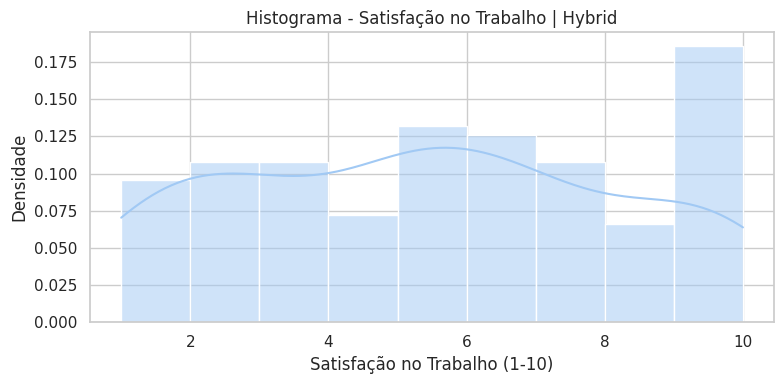

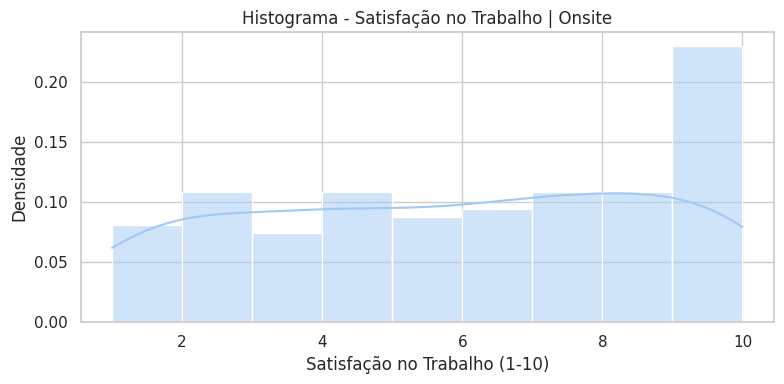

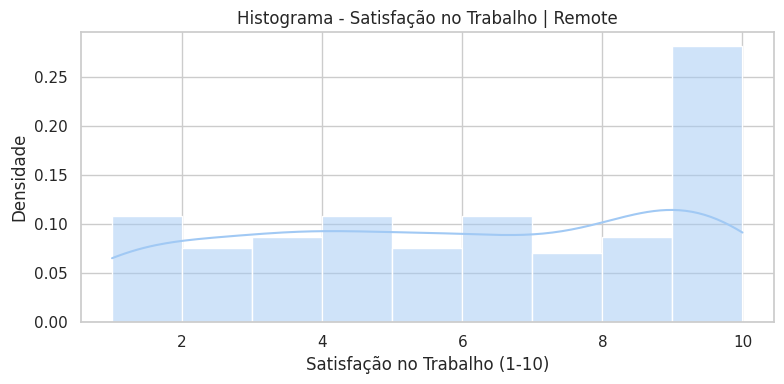

In [29]:
sns.set(style='whitegrid')

for grupo, valores in resultados_satisfacao.items():
    plt.figure(figsize=(8, 4))
    sns.histplot(valores, kde=True, stat='density', color=sns.color_palette("pastel")[0])

    plt.title(f"Histograma - Satisfação no Trabalho | {grupo}")
    plt.xlabel("Satisfação no Trabalho (1-10)")
    plt.ylabel("Densidade")
    plt.tight_layout()
    plt.show()

Assim como nos salários anuais, os testes de Shapiro-Wilk e os histogramas indicam que a variável Satisfação no Trabalho (1-10) não segue distribuição normal nos grupos de Flexibilidade Remota. Além disso, considerando-se que a variável de satisfação é do tipo discreta e baseada em uma escala de pontuação (score), não se espera que siga uma distribuição normal contínua, o que reforça a adequação do uso de métodos não paramétricos para sua análise.

Como nenhum dos dados segue distribuição normal, usaremos testes não-paramétricos.

### **4.2 Teste de Correlação de Spearman**
A correlação de Spearman (\$\rho\$) é uma medida não paramétrica que avalia a orça e a direção da associação monotônica entre duas variáveis quantitativas. Diferentemente da correlação de Pearson, que presume uma relação linear e distribuição normal dos dados, Spearman se baseia nas posições (ranks) dos dados em vez dos valores absolutos.

A correlação de Spearman é recomendada quando:
* Pelo menos uma das variáveis não segue uma distribuição normal (violando os pressupostos do teste de Pearson);
* Há presença de outliers que podem distorcer a correlação de Pearson;
* A relação entre as variáveis parece ser monotônica, mas não necessariamente linear;
* As variáveis são ordinais ou medidas em escalas não intervalares.

---
**Hipóteses** \\

* $H\_0\$: Não existe correlação monotônica entre as variáveis (i.e., \$\rho = 0\$);
* \$H\_1\$: Existe correlação monotônica entre as variáveis (i.e., \$\rho \neq 0\$).


---
**Cálculo** \\
Os dados são inicialmente transformados em ranks (valores ordenados). O coeficiente de Spearman é então calculado com base na diferença entre os ranks das duas variáveis:

$$
\rho = 1 - \frac{6 \sum d_i^2}{n(n^2 - 1)}
$$

onde \$d\_i\$ é a diferença entre os ranks das duas variáveis para cada observação \$i\$ e \$n\$ é o número de pares de dados.

---

**Interpretação:** \\
O valor do coeficiente $\rho$ varia de -1 a 1:
* $\rho$ = 1: correlação monotônica perfeitamente positiva;
* $\rho$ = -1: correlação monotônica perfeitamente negativa;
* $\rho$ = 0: ausência de correlação monotônica.


---




**Justificativa para uso neste trabalho:** \\
Como as análises de normalidade indicaram que as variáveis Salário Anual (BRL) e Satisfação no Trabalho (1-10) não seguem distribuição normal, e considerando que a variável de satisfação é discreta e baseada em pontuação, a correlação de Spearman é a abordagem mais adequada para avaliar a associação entre elas.


In [22]:
from scipy.stats import spearmanr

rho, p_valor = spearmanr(dados['Salário Anual (BRL)'], dados['Satisfação no Trabalho (1-10)'])

print(f"Coeficiente de correlação de Spearman: {rho:.2f}")
print(f"Valor-p: {p_valor:.4f}")

Coeficiente de correlação de Spearman: 0.03
Valor-p: 0.5055


Como o coeficiente de Spearman está próximo de zero e o valor-p é maior que 0,05, não foi identificada uma associação estatisticamente significativa entre o salário anual e o nível de satisfação no trabalho. A relação é muito fraca, e o valor-p elevado sugere que essa correlação pode ter ocorrido apenas por acaso.

## **5. Testes de hipóteses**

Usaremos o teste de Kruskal-Wallis para responder às três perguntas propostas porque ele é um teste não paramétrico adequado para comparar três ou mais grupos independentes quando não é possível assumir normalidade nas distribuições dos dados, condição verificada com o teste de Shapiro-Wilk.

### **Teste de Kruskal-Wallis**

O teste de Kruskal-Wallis é um teste estatístico não paramétrico utilizado para comparar mais de dois grupos independentes com relação a uma variável quantitativa. É indicado quando os dados não seguem distribuição normal ou não atendem aos pressupostos da ANOVA. Neste trabalho, o teste será aplicado para verificar se existem diferenças estatisticamente significativas entre os grupos analisados com base nas medianas.

---


**Hipóteses**
* $H_0$: as distribuições dos grupos são iguais (não há diferença significativa entre as medianas).
* $H_1$: pelo menos um dos grupos apresenta uma mediana significativamente diferente.


---

**Estatística de Teste – $H$**

Dada uma variável quantitativa medida em $k$ grupos independentes com tamanhos $n_1, n_2, \dots, n_k$, o cálculo da estatística $H$ segue os seguintes passos:

1. Combinar todas as observações dos grupos em um único conjunto e atribuir postos (ranks) a todos os valores.

2. Calcular a soma dos postos $R_j$ para cada grupo $j$, onde $j = 1, 2, \dots, k$.

3. Calcular a estatística $H$ por meio da fórmula: \\
$H = \frac{12}{N(N+1)} \sum_{j=1}^{k} \frac{R_j^2}{n_j} - 3(N+1)$ \\
onde $N$ é o número total de observações ($N = \sum n_j$), $R_j$ é a soma dos postos do grupo $j$ e $n_j$ é o número de observações no grupo $j$.

Se houver empates nos dados, aplica-se uma correção na fórmula para ajustar os postos.

4. Tomada de Decisão: A estatística $H$ segue, aproximadamente, uma distribuição qui-quadrado ($\chi^2$) com $k - 1$ graus de liberdade.
* Se o valor-p correspondente à estatística $H$ for menor que o nível de significância ($\alpha = 0{,}05$), rejeita-se $H_0$.
* Caso contrário, não se rejeita $H_0$.



---



**Aplicação Prática**

Neste trabalho, o teste de Kruskal-Wallis será utilizado para verificar se há **diferenças estatisticamente significativas nas medianas** entre os grupos analisados. Trata-se de uma etapa essencial para avaliar variações em variáveis quantitativas quando os pressupostos de normalidade não são atendidos.

A implementação será feita por meio da função `kruskal` da biblioteca `scipy.stats`, que calcula automaticamente a estatística de teste $H$ e o valor-p associado. A decisão será baseada no valor-p, adotando-se um nível de significância de 5%:

* Se $p > 0{,}05$: não rejeitamos $H_0$ ⟹ não há evidência de diferença entre os grupos.
* Se $p \leq 0{,}05$: rejeitamos $H_0$ ⟹ ao menos um grupo difere significativamente dos demais.

In [30]:
from scipy.stats import kruskal

### **5.1 Os salários variam entre os setores da indústria?**

Esta análise consiste na comparação da variável salário anual (quantitativa contínua) entre os diferentes setores da indústria (variável categórica com seis grupos). O teste avaliará se há evidências de que ao menos um setor apresenta uma mediana salarial significativamente diferente das demais.


In [31]:
# Agrupar os salários por setor da indústria
grupos_industria = [
    grupo['Salário Anual (BRL)'].dropna()
    for nome, grupo in dados.groupby("Indústria")
]

# Aplicar o teste de Kruskal-Wallis
stat, p = kruskal(*grupos_industria)

# Exibir resultados
print("Teste de Kruskal-Wallis - Salário por Setor da Indústria")
print(f"Estatística H: {stat:.4f}")
print(f"Valor-p: {p:.4f}")

# Interpretação
if p > 0.05:
    print("Não rejeita H₀.")
else:
    print("Rejeita H₀.")


Teste de Kruskal-Wallis - Salário por Setor da Indústria
Estatística H: 5.3734
Valor-p: 0.3720
Não rejeita H₀.


Como não rejeitamos H₀, não há evidência estatística que a mediana de pelo menos um setor seja diferente. Portanto, os salários não variam entre os setores.

### **5.2 A flexibilidade do trabalho remoto influencia na satisfação dos profissionais?**

Neste caso, analisamos a variável satisfação no trabalho (quantitativa discreta) em função dos diferentes níveis de flexibilidade remota (Remote, Onsite e Hybrid). O objetivo é verificar se há diferenças estatisticamente significativas nas medianas de satisfação entre os diferentes modelos de trabalho.

In [32]:
# Agrupar a satisfação por nível de flexibilidade remota
grupos_flexibilidade = [
    grupo['Satisfação no Trabalho (1-10)'].dropna()
    for nome, grupo in dados.groupby("Flexibilidade Remota")
]

# Aplicar o teste de Kruskal-Wallis
stat, p = kruskal(*grupos_flexibilidade)

# Exibir resultados
print("Teste de Kruskal-Wallis - Satisfação por Flexibilidade Remota")
print(f"Estatística H: {stat:.4f}")
print(f"Valor-p: {p:.4f}")

# Interpretação
if p > 0.05:
    print("Não rejeita H₀.")
else:
    print("Rejeita H₀.")

Teste de Kruskal-Wallis - Satisfação por Flexibilidade Remota
Estatística H: 2.3044
Valor-p: 0.3159
Não rejeita H₀.


Como não rejeitamos H₀, não há evidência estatística que a mediana da satisfação de pelo menos um modo de flexibilidade seja diferente. Portanto, a flexibilidade do trabalho remoto não influencia na satisfação dos profissionais.

### **5.3 Os salários diferem entre os diferentes níveis de flexibilidade remota?**
Nesta análise, comparamos os valores de salário anual entre os três grupos de flexibilidade remota: Remote, Onsite e Hybrid. Usaremos o teste de Kruskal-Wallis, que avalia se há diferenças estatisticamente significativas nas medianas salariais entre os grupos, com base na distribuição dos postos dos dados.

In [33]:
# Agrupar os salários por nível de flexibilidade remota
grupos_salario_flex = [
    grupo['Salário Anual (BRL)'].dropna()
    for nome, grupo in dados.groupby("Flexibilidade Remota")
]

# Aplicar o teste de Kruskal-Wallis
stat, p = kruskal(*grupos_salario_flex)

# Exibir resultados
print("Teste de Kruskal-Wallis - Salário por Flexibilidade Remota")
print(f"Estatística H: {stat:.4f}")
print(f"Valor-p: {p:.4f}")

# Interpretação
if p > 0.05:
    print("Não rejeita H₀.")
else:
    print("Rejeita H₀.")

Teste de Kruskal-Wallis - Salário por Flexibilidade Remota
Estatística H: 1.8260
Valor-p: 0.4013
Não rejeita H₀.


Como não rejeitamos H₀, não há evidência estatística que a mediana do salário de pelo menos um modo de flexibilidade seja diferente. Portanto, os salários não variam dada a flexibilidade do trabalho.